# Practice Session 04: Networks from text

Author: <font color="blue">Telmo Linacisoro</font>

E-mail: <font color="blue">telmomaximlian.linacisoro01@estudiant.upf.edu</font>

NIA: <font color="blue">253251</font>

Date: <font color="blue">17/10/2024</font>

# 1. Create the directed mention network

In [20]:
import io
import json
import gzip
import csv
import re
import pandas as pd

from IPython.display import Image

In [6]:
# Leave this code as-is

# Input file
COMPRESSED_INPUT_FILENAME = "CovidLockdownCatalonia.json.gz"

# These are the output files, leave as-is
OUTPUT_ALL_EDGES_FILENAME = "CovidLockdownCatalonia.csv"
OUTPUT_FILTERED_EDGES_FILENAME = "CovidLockdownCatalonia-min-weight-filtered.csv"
OUTPUT_CO_MENTIONS_FILENAME = "CovidLockdownCatalonia-co-mentions.csv"

## 1.1. Extract mentions

In [7]:
# Leave this code as-is

def extract_mentions(text):
    return re.findall("@([a-zA-Z0-9_]{5,20})", text)

print(extract_mentions("RT @elnacionalcat: check this post by @en_blau"))

['elnacionalcat', 'en_blau']


## 1.2. Count mentions


In [8]:
mentions_counter = {}

with gzip.open(COMPRESSED_INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
    for line in input_file:
        tweet = json.loads(line)
        author = tweet["user"]["screen_name"]
        message = tweet["full_text"]

        mentions = extract_mentions(message)

        for mention in mentions:
            key = (author, mention)
            if key in mentions_counter:
                mentions_counter[key] += 1
            else:
                mentions_counter[key] = 1

In [9]:
print(mentions_counter[('joanmariapique', 'catalangov')])

9


In [10]:
NUM_TIMES = 8

for (author, mention), count in mentions_counter.items():
    if count > NUM_TIMES:
        print(f"Author: @{author} mentioned @{mention} {count} times")

Author: @wualaswold1 mentioned @updayESP 9 times
Author: @emocionycambio mentioned @DrTedros 16 times
Author: @FXstreetNews mentioned @HareshMenghani 11 times
Author: @Txesnut1 mentioned @DrEricDing 11 times
Author: @joanmariapique mentioned @catalangov 9 times


In [11]:
# Leave this code as-is

with io.open(OUTPUT_ALL_EDGES_FILENAME, "w") as output_file:
    writer = csv.writer(output_file, delimiter='\t', quotechar='"')
    writer.writerow(["Source", "Target", "Weight"])
    for key in mentions_counter:
        author = key[0]
        mention = key[1]
        weight = mentions_counter[key]
        writer.writerow([author, mention, weight])

In [12]:
NUM_TIMES = 3

with io.open(OUTPUT_FILTERED_EDGES_FILENAME, "w") as output_file:
    writer = csv.writer(output_file, delimiter='\t', quotechar='"')
    writer.writerow(["Source", "Target","Weight"])
    for key in mentions_counter:
        weight = mentions_counter[key]
        if weight >= NUM_TIMES:
            author = key[0]
            mention = key[1]
            writer.writerow([author, mention, weight])

# 2. Visualize the directed mention network


## 2.1. Visualize the largest connected component


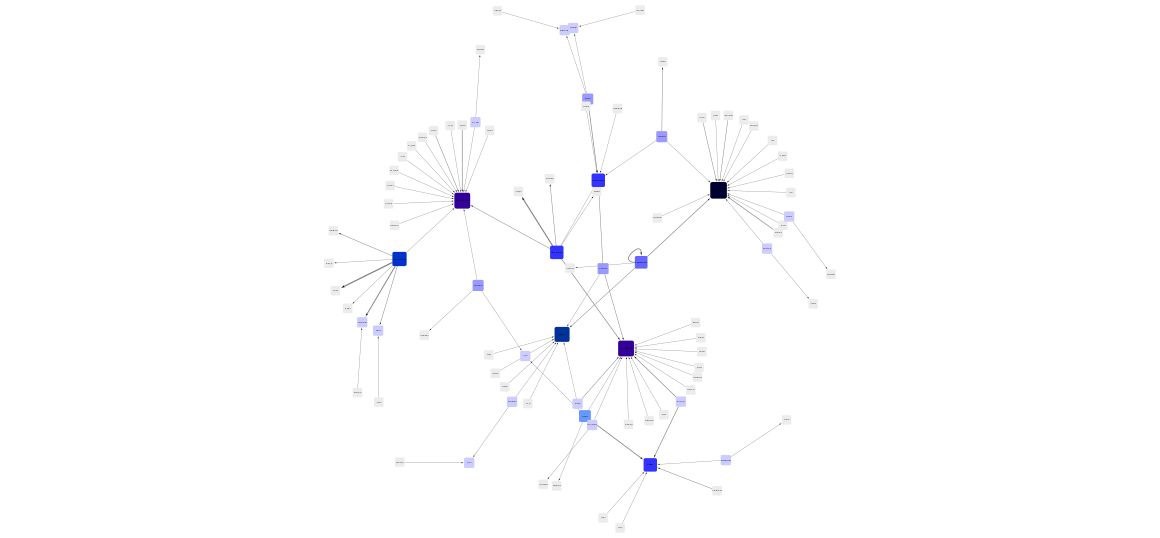

In [ ]:
# Adjust width/height as needed

Image(url="mentions-largest-cc.png", width=1200)

**<font color="red">By looking at the network analizer we can see that the network diameter of the largest connected component is 10. Moreover, the size of the largest connected components is of 90 nodes, which is 25.21% of the total nodes in the graph. The size of the second largest connect component is of 17 nodes, which is 4.76% of the total nodes in the graph.**

## 2.2. Cluster the largest connected component


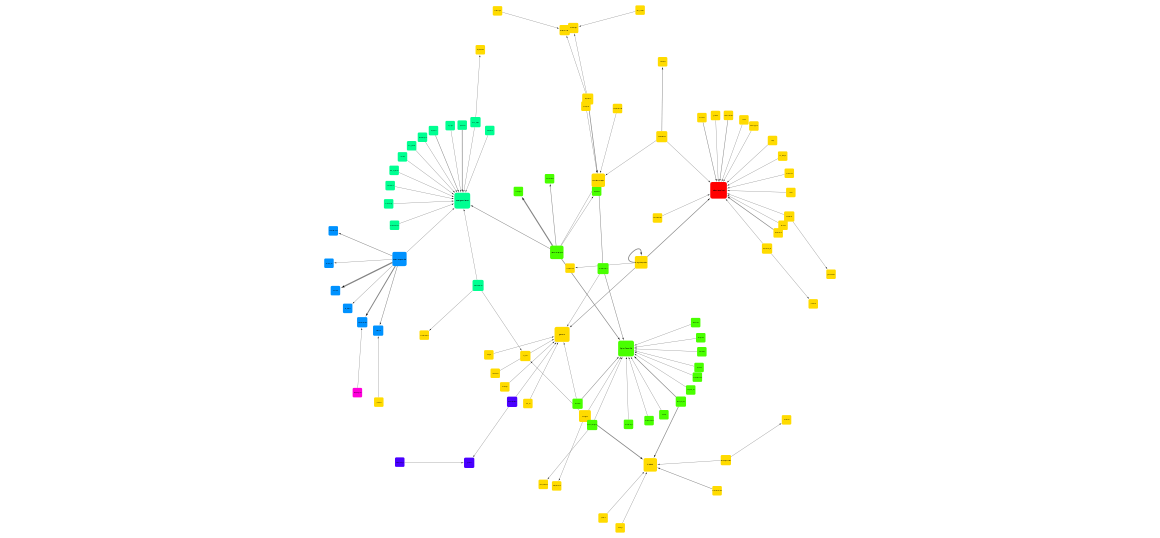

**<font color="red">Most nodes are clustered in lime green, representing cluster 1. The nodes with more than one connection, which also have both incoming and outgoing edges, are categorized as having the highest edge betweenness. We can see the account @elnacionalcat at the top-right of the network, marked in red. This cluster indicates that these accounts are connected through tweet or retweet relationships, suggesting thematic or topical similarity.**

**<font color="red">The account @elnacionalcat is located at the top-right of the network, represented in red. Three accounts in the same cluster are @govern, @gencat and @emergenciescat. These accounts are related, because they're all political institutions.**


## 2.3. Examine degree distributions


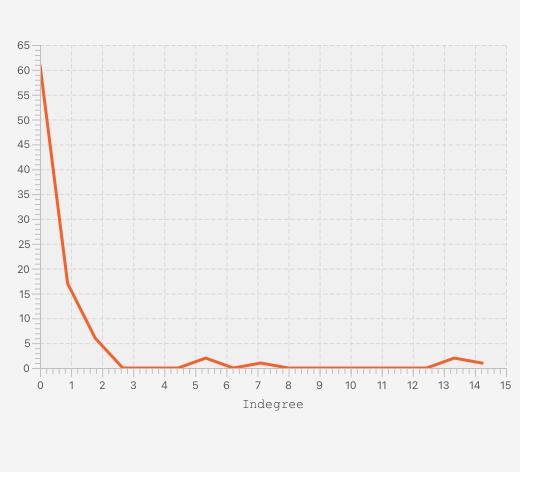

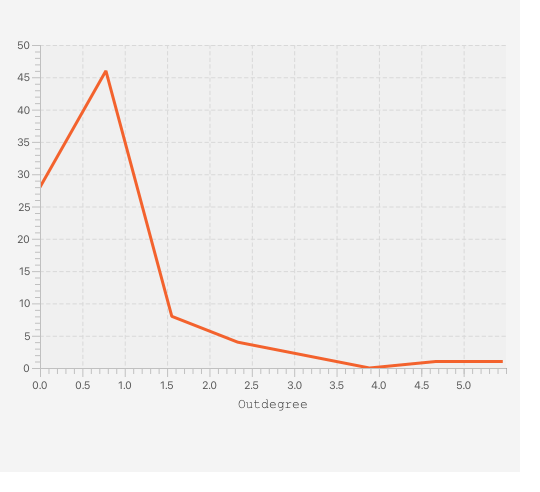

In [ ]:
# Adjust width/height as needed

display(Image(url="mentions-largest-cc-indegree.png", width=400))

display(Image(url="mentions-largest-cc-outdegree.png", width=400))

**<font color="red">The in-degree distribution shows a strong drop, with most nodes having low in-degrees, which means that many nodes receive few or no connections, while a few act as hubs.**

**<font color="red">The out-degree distribution peaks at 1, which means that most nodes have a single outgoing connection, with a strong drop for high out-degrees.**

# 3. Create the undirected co-mention network


In [15]:
co_mentions_counter = {}
with gzip.open(COMPRESSED_INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
    for line in input_file:
        tweet = json.loads(line)
        mention1 = tweet["user"]["screen_name"]
        mention2 = tweet["user"]["screen_name"]
        message = tweet["full_text"]

        mentions = extract_mentions(message)
        for mention1 in mentions:
            for mention2 in mentions:
                if mention1 < mention2:
                    key = (mention1, mention2)
                    if key in co_mentions_counter:
                        co_mentions_counter[key] += 1
                    else:
                        co_mentions_counter[key] = 1

In [16]:
# KEEP AS-IS

print(co_mentions_counter[('educaciocat', 'elnacionalcat')])

8


In [17]:
for pair, count in co_mentions_counter.items():
    if count >= 20:
        print(f"{pair}: {count}")

('VilaWeb', 'mossos'): 20
('QuimTorraiPla', 'govern'): 92
('sanchezcastejon', 'tjparfitt'): 28
('elnacionalcat', 'joseantich'): 90
('QuimTorraiPla', 'tjparfitt'): 59
('QuimTorraiPla', 'sanchezcastejon'): 25
('emergenciescat', 'govern'): 31
('josepcosta', 'sanchezcastejon'): 49
('eldiarioes', 'iescolar'): 28
('gencat', 'govern'): 105
('mossos', 'semgencat'): 44
('elnacionalcat', 'juansrod1'): 30
('QuimTorraiPla', 'emergenciescat'): 75
('Antoni_Gelonch', 'sanchezcastejon'): 106


In [18]:
with io.open(OUTPUT_CO_MENTIONS_FILENAME, "w") as output_file:
    writer = csv.writer(output_file, delimiter='\t', quotechar='"')
    writer.writerow(["Source", "Target", "Weight"])
    for key in co_mentions_counter:
        user1 = key[0]
        user2 = key[1]
        weight = co_mentions_counter[key]
        writer.writerow([user1, user2, weight])

# 4. Visualize the undirected co-mention network in Cytoscape


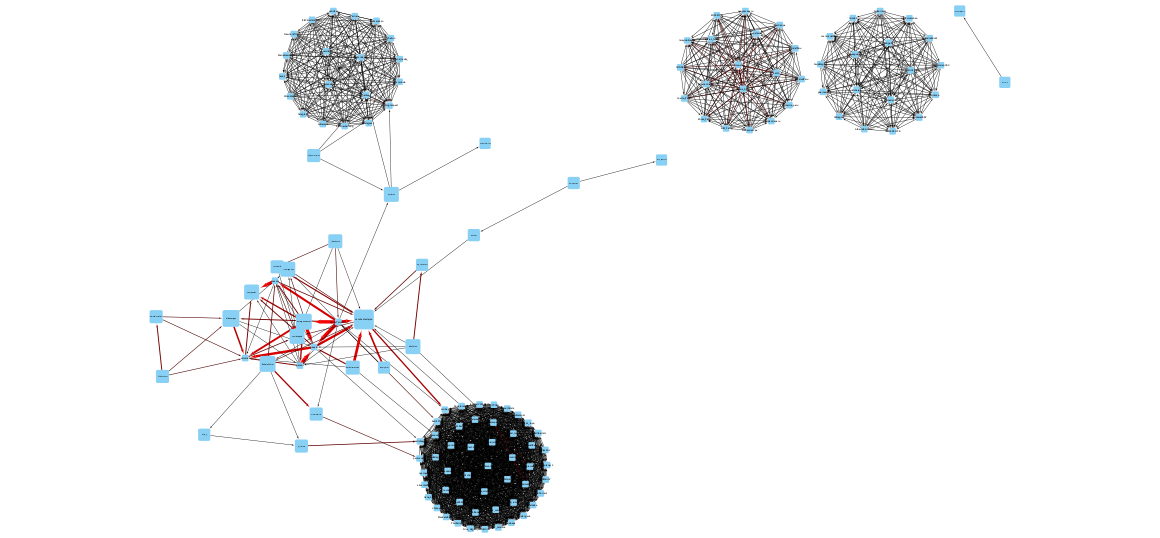

In [ ]:
# Adjust width/height as needed

Image(url="co-mentions-min-degree-17.png", width=1200)

**<font color="red"> We can see a couple of star-shaped structures that are dense and some other that are more lightly connected. This shows that in gerenal, the comentions tends to be within a defined group.**

**<font color="red"> Moreover, these very dense networks are either very slightly connected to other parts of the graph or not at all, which shows that the co-mentions tend to remain within its group**

# **<font color="red">I hereby declare that, except for the code provided by the course instructors, all of my code, text, and figures were produced by myself.</font>**